In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

import json

## Mapas de Ativação

Modelo VGG16.

In [23]:
def get_gradcam_heatmap(model, img_array, class_index):
    # Obter a última camada convolucional
    last_conv_layer = model.get_layer('block5_conv3')
    heatmap_model = Model([model.inputs], [last_conv_layer.output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = heatmap_model(img_array)
        loss = predictions[:, class_index]

    # Obter os gradientes da perda em relação às saídas da camada convolucional
    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Criar o mapa de ativação
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0)  # ReLU
    heatmap /= tf.math.reduce_max(heatmap)
    
    return heatmap.numpy()

In [24]:
def display_heatmap(heatmap, img_path):
    img = image.load_img(img_path)
    img_array = image.img_to_array(img)
    
    plt.imshow(img_array / 255.)
    plt.imshow(heatmap, cmap='viridis', alpha=0.5)
    plt.show()

In [25]:
def get_img_array(img):
    
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [26]:
def get_top_predictions(preds):
    previsoes = decode_predictions(preds, top = 5)[0]
    #return previsoes
    previsao = [f"Raça: {i[1].ljust(20)} Prob: {round( i[2] * 100, ndigits= 2) }%" for i in previsoes]
    return previsao

In [28]:
model = VGG16(weights='imagenet')

In [29]:
img_path = r'data\dogs\dog.10.jpg'

img = image.load_img(img_path, target_size=(224, 224))

In [30]:
img_array = get_img_array(img)

preds = model.predict(img_array)
class_index = np.argmax(preds[0])

heatmap = get_gradcam_heatmap(model, img_array, class_index)

top_prevs = get_top_predictions(preds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


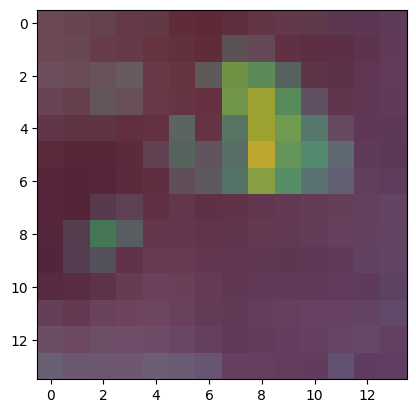

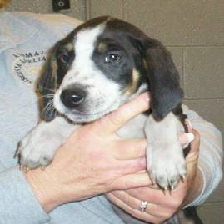

Raça: bluetick             Prob: 42.79%
Raça: Walker_hound         Prob: 19.94%
Raça: basset               Prob: 13.51%
Raça: beagle               Prob: 5.28%
Raça: English_foxhound     Prob: 3.62%


In [31]:
display_heatmap(heatmap, img_path)
display(img)
_ = [print(i) for i in top_prevs]

## Mapas de Saliência

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm

In [15]:
model = VGG16(weights='imagenet')
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [32]:
img_path = r'data\dogs\dog.10.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Função para previsão
def predict_proba(x):
    x = preprocess_input(x)
    return model.predict(x)

In [33]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(img_array[0], predict_proba, segmentation_fn=SegmentationAlgorithm('slic'))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


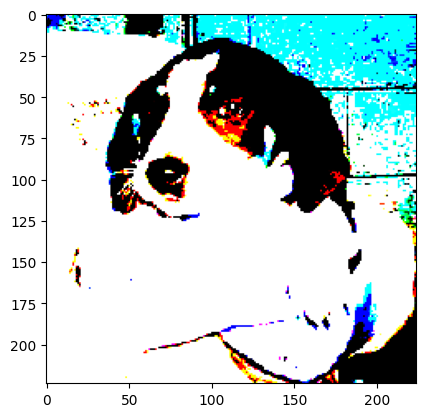

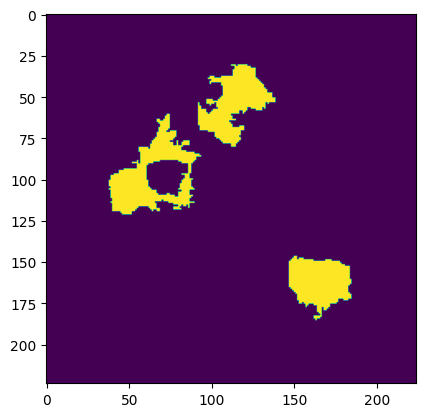

In [34]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(temp)
plt.show()

plt.imshow(mask)
plt.show()

In [35]:
import streamlit as st
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

In [38]:
tf.__version__

'2.17.0'